IMPORT LIBRARIES

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

LOAD DATA

In [59]:
df = pd.read_csv('../../data/Database.csv')

print(f"Dataset shape: {df.shape}")
display(df.head())


Dataset shape: (9837, 9)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


INITIAL DATA EXPLORATION

In [60]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB
None


In [61]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape:
Rows: 9837, Columns: 9


In [62]:
print("Column Names:")
print(df.columns.tolist())
print("Data Types:")
print(df.dtypes)

Column Names:
['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url']
Data Types:
Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object


In [63]:
# Convert Vote_Count and Vote_Average to float64
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object


DATA QUALITY ASSESSMENT

In [64]:
print("Missing Values:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Total': len(df),
    'Missing_Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

Missing Values:
                              Column  Missing_Count  Total  Missing_Percentage (%)
Vote_Count                Vote_Count             11   9837                    0.11
Poster_Url                Poster_Url             11   9837                    0.11
Genre                          Genre             11   9837                    0.11
Vote_Average            Vote_Average             11   9837                    0.11
Popularity                Popularity             10   9837                    0.10
Original_Language  Original_Language             10   9837                    0.10
Title                          Title              9   9837                    0.09
Overview                    Overview              9   9837                    0.09


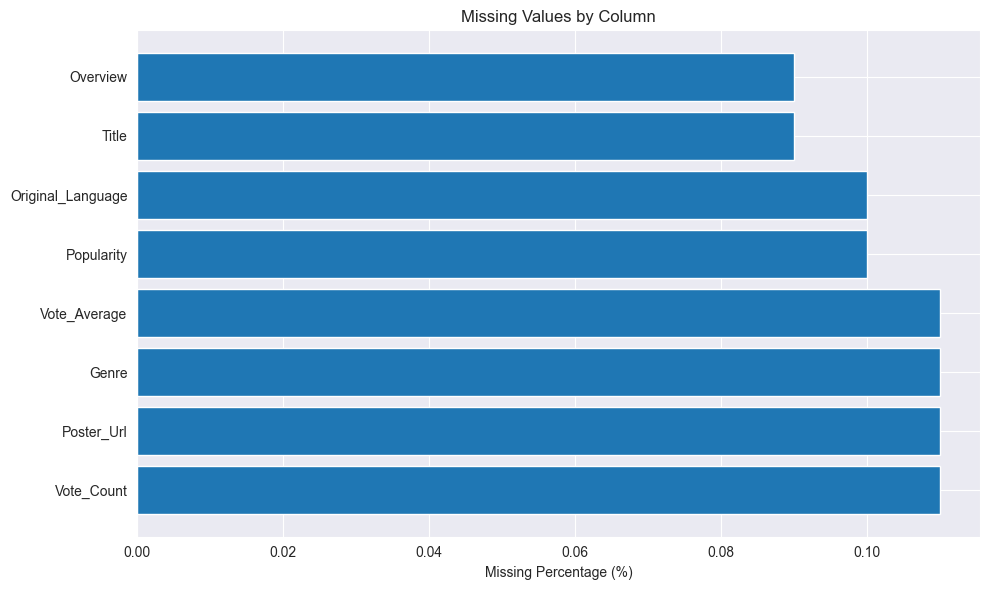

In [65]:
if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage (%)'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

In [66]:
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [67]:
print("Statistics:")
print(df.describe())

Statistics:
        Popularity    Vote_Count  Vote_Average
count  9827.000000   9826.000000   9826.000000
mean     40.320672   1392.943721      6.439467
std     108.875673   2611.303856      1.129797
min       7.100000      0.000000      0.000000
25%      16.127500    146.000000      5.900000
50%      21.191000    444.000000      6.500000
75%      35.174500   1376.000000      7.100000
max    5083.954000  31077.000000     10.000000


In [68]:
display(df)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896.0,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8.0,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94.0,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152.0,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


DATA CLEANING

In [69]:
# Create a copy for cleaning
df_clean = df.copy()

In [70]:
# Clean date
df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')

df_clean['Year'] = df_clean['Release_Date'].dt.year
df_clean['Month'] = df_clean['Release_Date'].dt.month
df_clean['Month_Name'] = df_clean['Release_Date'].dt.month_name()
df_clean['Day_of_Week'] = df_clean['Release_Date'].dt.day_name()

In [71]:
print(f"Invalid dates found: {df_clean['Release_Date'].isnull().sum()}")


Invalid dates found: 10


In [72]:
# Clean numeric columns
numeric_cols = ['Popularity', 'Vote_Count', 'Vote_Average']

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    print(f"{col}: {df_clean[col].isnull().sum()} invalided values")

# Fill NaN by 0
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

Popularity: 10 invalided values
Vote_Count: 11 invalided values
Vote_Average: 11 invalided values


In [73]:
# Clean text columns
text_cols = ['Title', 'Overview', 'Original_Language']

for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()
        df_clean[col] = df_clean[col].replace('nan', '')

In [74]:
# Clean URLs
df_clean['Has_Poster'] = df_clean['Poster_Url'].notna() & (df_clean['Poster_Url'] != '')

In [75]:
# Parse Genre column
df_clean['Genre_List'] = df_clean['Genre'].str.split(',').apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])
df_clean['Genre_Count'] = df_clean['Genre_List'].apply(len)
df_clean['Primary_Genre'] = df_clean['Genre_List'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

In [76]:
# Remove Duplicated Rows

before_dup = len(df_clean.columns)
df_clean = df_clean.drop_duplicates(subset=[
    "Title", "Release_Date", "Popularity", "Vote_Count", "Vote_Average"
])
after_dup = len(df_clean.columns)
print(f"Removed {before_dup - after_dup} duplicate rows")

Removed 0 duplicate rows


In [ ]:
# Rating Category
df_clean['Rating_Category'] = pd.cut(df_clean['Vote_Average'],
                                      bins=[0, 5, 7, 8, 10],
                                      labels=['Low', 'Medium', 'High', 'Excellent'])

In [ ]:
# Popularity categories
df_clean['Popularity_Category'] = pd.qcut(df_clean['Popularity'],
                                           q=4,
                                           labels=['Low', 'Medium', 'High', 'Very High'],
                                           duplicates='drop')

In [79]:
print(f"Final dataset shape: {df_clean.shape}")
display(df_clean.head())

Final dataset shape: (9829, 17)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year,Month,Month_Name,Day_of_Week,Has_Poster,Genre_List,Genre_Count,Primary_Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0,12.0,December,Wednesday,True,"[Action, Adventure, Science Fiction]",3,Action
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0,3.0,March,Tuesday,True,"[Crime, Mystery, Thriller]",3,Crime
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0,2.0,February,Friday,True,[Thriller],1,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0,11.0,November,Wednesday,True,"[Animation, Comedy, Family, Fantasy]",4,Animation
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0,12.0,December,Wednesday,True,"[Action, Adventure, Thriller, War]",4,Action


In [81]:
df_clean.to_csv('../../data/Database_Cleaned.csv', index=False)